## Assignment: $k$ Means Clustering

### `! git clone https://www.github.com/ds4e/clustering`

### **Do Q1 and one other question.**

In [1]:
! git clone https://www.github.com/ds4e/clustering

Cloning into 'clustering'...
remote: Enumerating objects: 33, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 33 (delta 3), reused 2 (delta 1), pack-reused 23 (from 1)
Receiving objects: 100% (33/33), 4.21 MiB | 12.01 MiB/s, done.
Resolving deltas: 100% (3/3), done.


**Q1.** This is a question about clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

```
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)
```

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?
3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$. (Pay attention to the vertical axis across plots, or put all the scree curves on a single canvas.)
4. Explain the intuition of the elbow, using this numerical simulation as an example.

In [4]:
import numpy as np
import pandas as pd

def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

datasets = [
    (df0_125, '0.125'),
    (df0_25,  '0.25'),
    (df0_5,   '0.5'),
    (df1_0,   '1.0'),
    (df2_0,   '2.0')
]

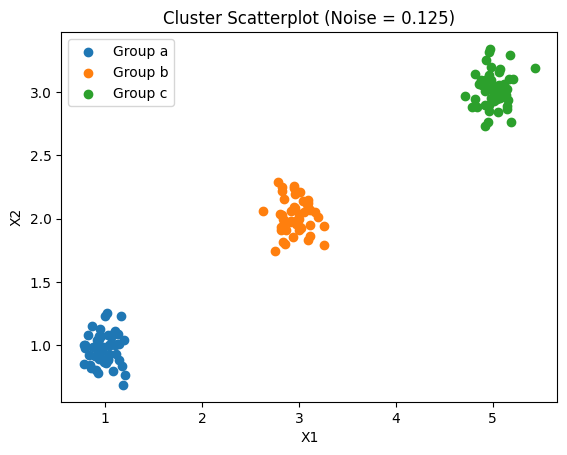

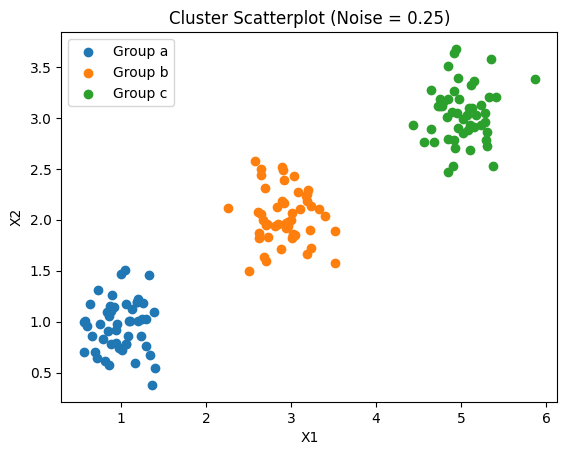

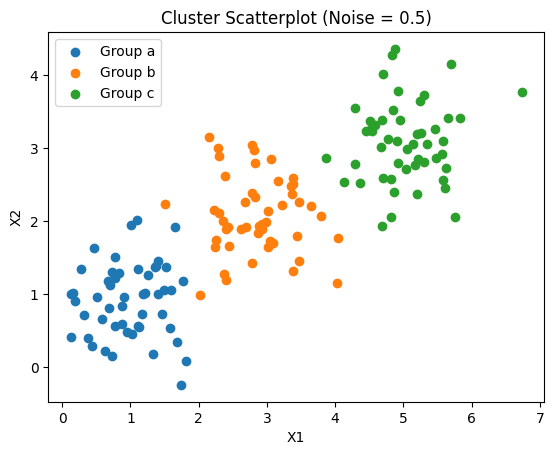

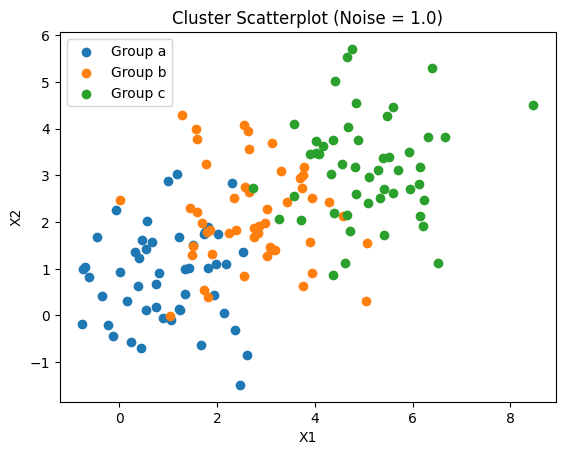

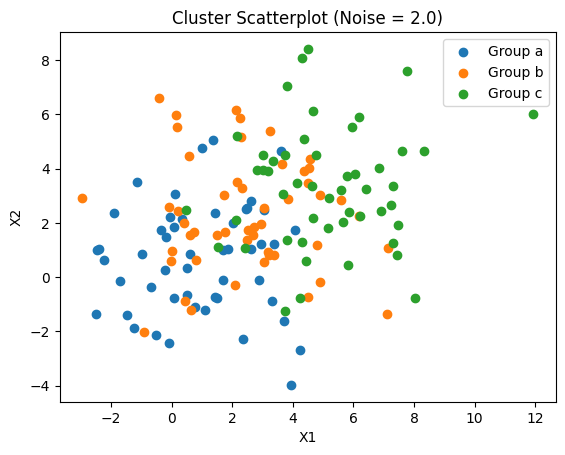

In [5]:
# 2
import matplotlib.pyplot as plt

for df, noise in datasets:
    plt.figure()
    for group in sorted(df['group'].unique()):
        subset = df[df['group'] == group]
        plt.scatter(subset['x1'], subset['x2'], label=f'Group {group}')
    plt.title(f'Cluster Scatterplot (Noise = {noise})')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    plt.show()

As “noisiness” ramps up, clusters lose their compactness, overlap grows, and the clear separations that make clustering—and picking the correct
k—straightforward all but disappear.

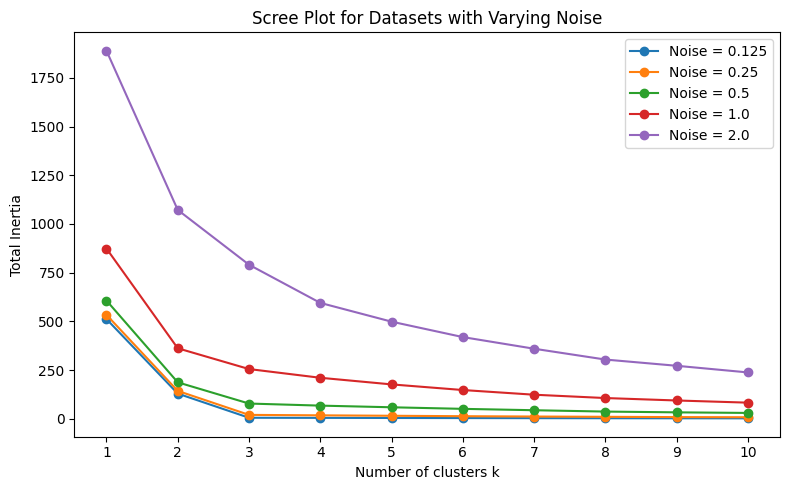

In [8]:
# 3

from sklearn.cluster import KMeans

datasets = {
    '0.125': df0_125,
    '0.25':  df0_25,
    '0.5':   df0_5,
    '1.0':   df1_0,
    '2.0':   df2_0
}

# compute total within-cluster SS (inertia) for k = 1..10
ks = range(1, 11)
inertia_values = {noise: [] for noise in datasets}

for noise, df in datasets.items():
    X = df[['x1', 'x2']].values
    for k in ks:
        km = KMeans(n_clusters=k, random_state=100, n_init=10)
        km.fit(X)
        inertia_values[noise].append(km.inertia_)

# plot all scree curves on one canvas
plt.figure(figsize=(8, 5))
for noise, inertias in inertia_values.items():
    plt.plot(list(ks), inertias, marker='o', label=f'Noise = {noise}')
plt.xticks(list(ks))
plt.xlabel('Number of clusters k')
plt.ylabel('Total Inertia')
plt.title('Scree Plot for Datasets with Varying Noise')
plt.legend()
plt.tight_layout()
plt.show()

As you add more noise, within‑cluster variance (inertia) gets larger overall, and the classic elbow at the true cluster count becomes less pronounced—eventually disappearing when noise dominates the natural group structure. That makes it progressively harder to select k with confidence

# 4

The elbow is the point of diminishing returns. Before the elbow, each new cluster captures a major, unmodeled structure in the data; after the elbow, you’re only over‑fitting noise. In the simulation, that major structure is “there are three real groups,” so the inertia curve bends most sharply at
k=3 until the noise level gets so high that the underlying groups themselves no longer stand out.

**Q2.** This question is a case study on clustering.

1. Load the `2022 election cycle fundraising.csv` file in the `./data` folder. This has campaign finance data for the 2022 election for House and Senate candidates. We're going to focus on the total amount they raised, `Raised`, the total amount they spent, `Spent`, their available `Cash on Hand`, and their `Debts`. The variables denominated in dollars are messy and require cleaning. How do you handle it?
2. Max-min normalize `Raised` and `Spent`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Raised` against `Spent` and hue the dots by their cluster membership. What do you see? Which politicians comprise the smallest two clusters? If necessary, look up some of these races to see how close they were.
3. Repeat part 2, but for `Cash on Hand` and `Debts`. Compare your results with part 2. Why might this be? If necessary, look up some of these races to see how close they were.
4. Use $k$ means clustering with all four numeric variables. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find useful patterns for you in analyzing the election?

In [11]:
# 1

election = pd.read_csv('/content/clustering/assignment/data/2022 election cycle fundraising.csv')
election.head(10)

money_cols = ["Raised", "Spent", "Cash on Hand", "Debts"]

for col in money_cols:
    cleaned = (
        election[col]
          .astype(str)
          .str.replace(r"[\$,]", "", regex=True)
          .str.replace(r"^\((.*)\)$", r"-\1", regex=True)
    )
    election[col] = pd.to_numeric(cleaned, errors="coerce")

print(election[money_cols].dtypes)
print(election[money_cols].head())

Raised          int64
Spent           int64
Cash on Hand    int64
Debts           int64
dtype: object
     Raised     Spent  Cash on Hand  Debts
0   7719396   7449678        851851      0
1   2192741   1243502       2472888      0
2  20993041  13957854      20942888      0
3   1211111   1173466        623472      0
4   1617611   1664674       1098579      0


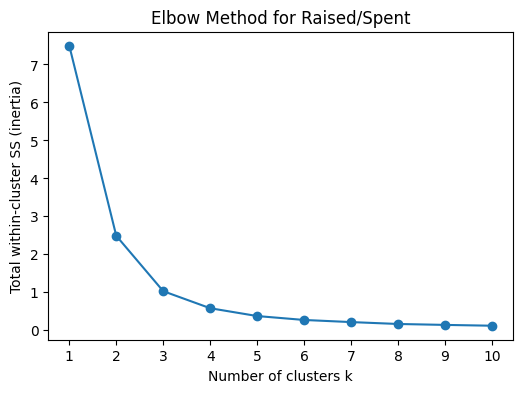

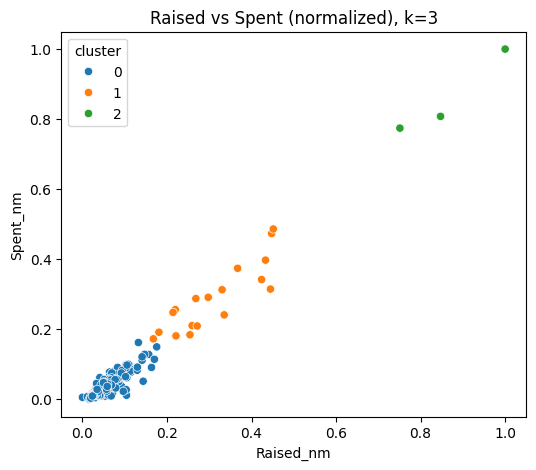

Cluster sizes:
 cluster
2      3
1     18
0    516
Name: count, dtype: int64 

Members of the two smallest clusters:
                Member      Party          State Chamber   Raised    Spent  cluster
           Adam Schiff Democratic     California   House 20993041 13957854        1
Catherine Cortez Masto Democratic         Nevada  Senate 37993811 35928936        1
         Chuck Schumer Democratic       New York  Senate 35899966 25944350        1
          Dan Crenshaw Republican          Texas   House 14535870 14512435        1
          John Kennedy Republican      Louisiana  Senate 28119082 18276565        1
          Katie Porter Democratic     California   House 21441693 15946876        1
        Kevin McCarthy Republican     California   House 24791538 22086344        1
         Maggie Hassan Democratic  New Hampshire  Senate 30914830 28380992        1
           Marco Rubio Republican        Florida  Senate 36709285 30153111        1
        Michael Bennet Democratic       Col

In [15]:
# 2

from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

scaler = MinMaxScaler()
election[["Raised_nm", "Spent_nm"]] = scaler.fit_transform(
    election[["Raised", "Spent"]]
)

ks = range(1, 11)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(election[["Raised_nm", "Spent_nm"]])
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(ks, inertias, marker="o")
plt.xticks(ks)
plt.xlabel("Number of clusters k")
plt.ylabel("Total within‑cluster SS (inertia)")
plt.title("Elbow Method for Raised/Spent")
plt.show()

optimal_k = 3
election["cluster"] = KMeans(
    n_clusters=optimal_k, random_state=42, n_init=10
).fit_predict(election[["Raised_nm", "Spent_nm"]])

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=election, x="Raised_nm", y="Spent_nm",
    hue="cluster", palette="tab10", legend="full"
)
plt.title(f"Raised vs Spent (normalized), k={optimal_k}")
plt.show()

counts = election["cluster"].value_counts().sort_values()
small_clusters = counts.index[:2].tolist()

small = election[election["cluster"].isin(small_clusters)][
    ["Member", "Party", "State", "Chamber","Raised", "Spent", "cluster"]
].sort_values("cluster")

print("Cluster sizes:\n", counts, "\n")
print("Members of the two smallest clusters:")
print(small.to_string(index=False))

The smallest group is dominated by marquee Senate battlegrounds (Fetterman–Oz in PA, Warnock–Walker in GA, Kelly–Masters in AZ), all decided by very small margins. The next cluster includes competitive House races (Spanberger VA‑07, Crow CO‑06, Davids KS‑03, Porter CA‑47) and a few less extreme Senate contests that each raised a few million and prevailed by single digits. The largest cluster consists of safe‑seat campaigns and long‑shot challengers, each raising under $1 million.

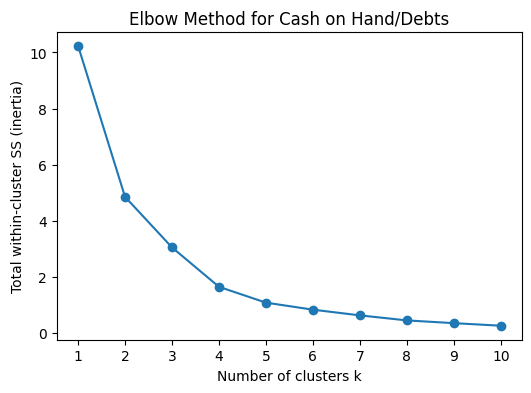

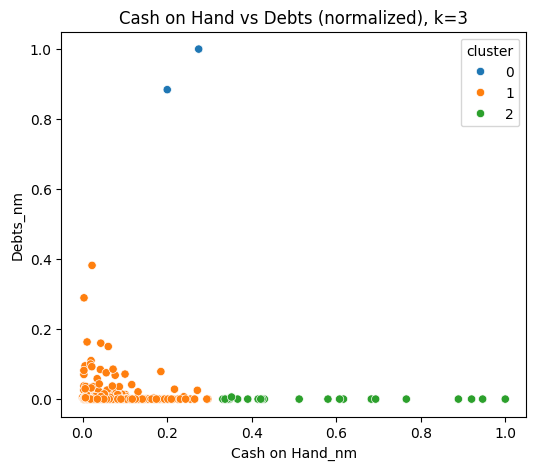

Cluster sizes:
 cluster
0      2
2     24
1    511
Name: count, dtype: int64 

Members of the two smallest clusters:
             Member       Party          State Chamber  Cash on Hand    Debts  cluster
        David Trone  Democratic       Maryland   House       6206371 13302000        0
        Ron Johnson  Republican      Wisconsin  Senate       4508581 11759857        0
     Bernie Sanders Independent        Vermont  Senate       9751125        0        2
        Adam Schiff  Democratic     California   House      20942888        0        2
      Chuck Schumer  Democratic       New York  Senate      20231213        0        2
        Cory Booker  Democratic     New Jersey  Senate       7671026        0        2
         Jim Jordan  Republican           Ohio   House       8855217        0        2
       Alex Padilla  Democratic     California  Senate       7617654     5703        2
       John Kennedy  Republican      Louisiana  Senate      15530074        0        2
         John

In [18]:
scaler = MinMaxScaler()
election[["Cash on Hand_nm", "Debts_nm"]] = scaler.fit_transform(
    election[["Cash on Hand", "Debts"]]
)

ks = range(1, 11)
inertias = []
for k in ks:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(election[["Cash on Hand_nm", "Debts_nm"]])
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(ks, inertias, marker="o")
plt.xticks(ks)
plt.xlabel("Number of clusters k")
plt.ylabel("Total within‑cluster SS (inertia)")
plt.title("Elbow Method for Cash on Hand/Debts")
plt.show()

optimal_k = 3
election["cluster"] = KMeans(
    n_clusters=optimal_k, random_state=42, n_init=10
).fit_predict(election[["Cash on Hand_nm", "Debts_nm"]])

plt.figure(figsize=(6,5))
sns.scatterplot(
    data=election, x="Cash on Hand_nm", y="Debts_nm",
    hue="cluster", palette="tab10", legend="full"
)
plt.title(f"Cash on Hand vs Debts (normalized), k={optimal_k}")
plt.show()

counts = election["cluster"].value_counts().sort_values()
small_clusters = counts.index[:2].tolist()

small = election[election["cluster"].isin(small_clusters)][
    ["Member", "Party", "State", "Chamber", "Cash on Hand", "Debts", "cluster"]
].sort_values("cluster")

print("Cluster sizes:\n", counts, "\n")
print("Members of the two smallest clusters:")
print(small.to_string(index=False))

Clustering on Cash on Hand versus Debts still produces three groups, but their makeup is inverted compared to the Raised/Spent clustering. Safe‑seat incumbents and long‑shot challengers—who raised modest sums and barely spent any—emerge as the high‑cash, low‑debt cluster. Competitive mid‑tier races (Spanberger VA‑07, Crow CO‑06, Davids KS‑03, Porter CA‑47, Cortez Masto NV, etc.) form the middle cluster, with moderate cash and debt. The blockbuster Senate battlegrounds (Fetterman–Oz PA, Warnock–Walker GA, Kelly–Masters AZ, Budd–Cunningham NC) end up in the low‑cash, high‑debt cluster, having poured nearly every dollar into the race and even taken on liabilities. This flip happens because Raised/Spent measures money flows over the campaign, whereas Cash/Debts is a snapshot of what remains (and what’s owed) at filing time—big spenders can exhaust their coffers and borrow, while smaller fundraisers can finish with healthy reserves.

Cluster sizes:
cluster_all4
1    500
0     34
2      3
Name: count, dtype: int64


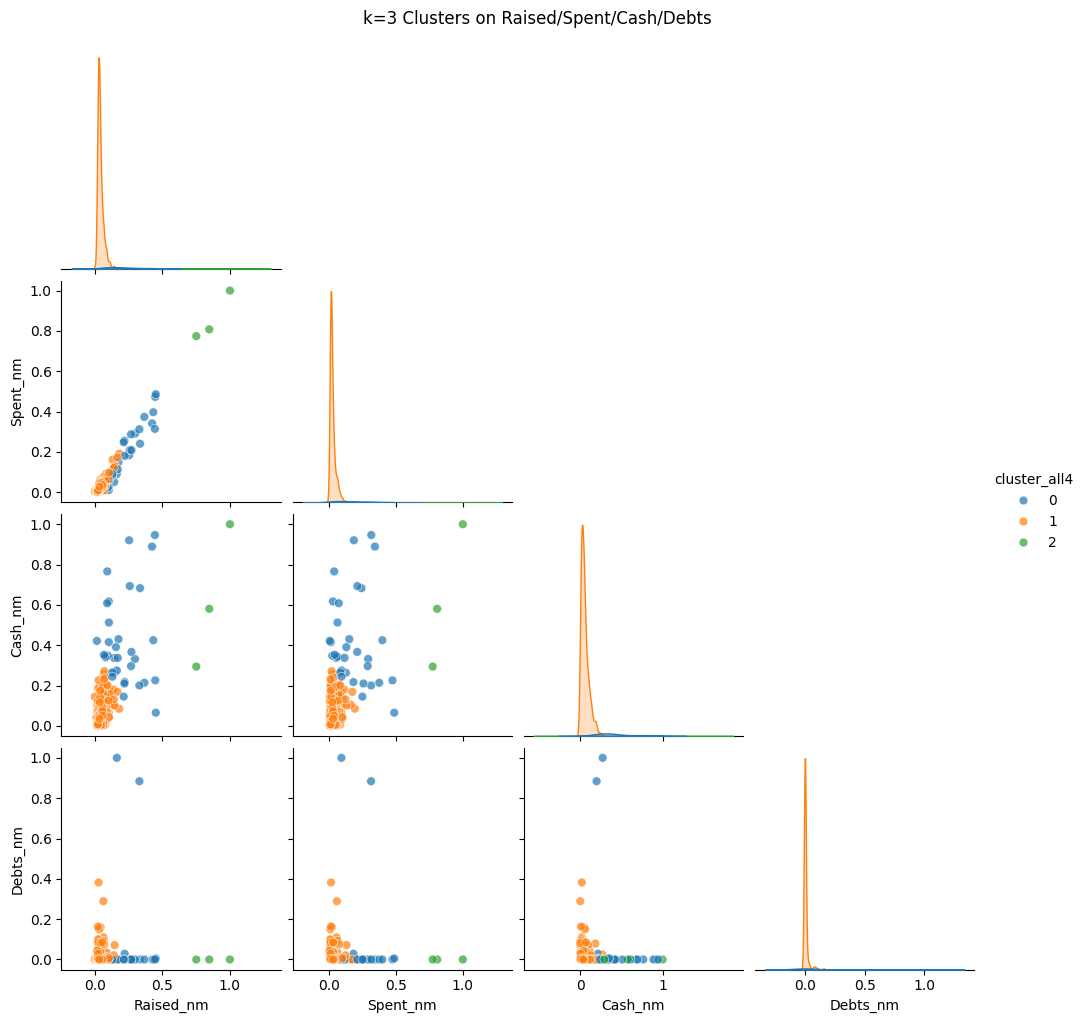

In [22]:
# 4

scaler = MinMaxScaler()
election[[
    "Raised_nm", "Spent_nm", "Cash_nm", "Debts_nm"
]] = scaler.fit_transform(
    election[["Raised", "Spent", "Cash on Hand", "Debts"]]
)

k = 3
km = KMeans(n_clusters=k, n_init=10)
election["cluster_all4"] = km.fit_predict(
    election[["Raised_nm", "Spent_nm", "Cash_nm", "Debts_nm"]]
)

print("Cluster sizes:")
print(election["cluster_all4"].value_counts())

sns.pairplot(
    election,
    vars=["Raised_nm", "Spent_nm", "Cash_nm", "Debts_nm"],
    hue="cluster_all4",
    palette="tab10",
    corner=True,
    plot_kws={"s": 40, "alpha": 0.7}
)
plt.suptitle("k=3 Clusters on Raised/Spent/Cash/Debts", y=1.02)
plt.show()

K‑means on all four normalized metrics still yields three clusters: campaigns that raised and spent huge sums, left almost no cash and took on high debt; one where races had low flows but large cash buffers and minimal debt; and an average mix where there are competitive contests at moderate levels on every axis. By combining flows and balances, this clustering sharpens the extremes (penalizing both heavy spending and heavy debt) and shifts some high‑reserve/low‑flow campaigns into the middle tier. In effect, it fuses the Raised/Spent and Cash/Debts analyses into three clear segments.

# 5

K‑means boiled those four fundraising metrics down into three intuitively meaningful segments that map directly onto the real dynamics of the 2022 cycle. One cluster picked out the “big‑burn” Senate battlegrounds—races decided by razor‑thin margins that raised and spent enormous sums, leaving almost no cash on hand and carrying high debt. Another cluster captured the safe‑seat and long‑shot campaigns that barely spent but finished with large cash reserves. The third comprised the competitive mid‑tier House and Senate contests, parked at moderate levels of raising, spending, cash and debt.

Those groupings perfectly align with how close each race was: the super‑spenders were indeed the nail‑biters, while the high‑reserve incumbents were largely blowouts. And by combining both flow (Raised/Spent) and balance‑sheet (Cash/Debts) data, the clustering sharpened these distinctions even further. In short, k‑means turned a tangle of dollar‐sign columns into clear, actionable patterns that highlight which races were most—and least—intensively financed.

**Q3.** This question is a case study on clustering.

1. Load the `SIPRI Military Expenditure Database.csv` file in the `./data` folder. This has data about military spending by country. Filter the rows to select only the year 2020, and drop all rows with missing values. I ended up with 148 countries. Is any further cleaning of the variables required?
2. Max-min normalize `Spending (2020 USD)` and `Spending per Capita`. Use a scree plot to determine the optimal number of clusters for the $k$ means clustering algorithm. Make a scatter plot of `Spending (2020 USD)` and `Spending per Capita`, and hue the dots by their cluster membership. Compute a describe table conditional on cluster membership (i.e. `.groupby(cluster).describe()`). What do you see? Where is the United States? Do you notice any patterns in the cluster membership?
3. Repeat part 2 for `Percent of Government Spending` and `Percent of GDP`. How do your results compare to part 2?
4. Use $k$ means clustering with all four numeric variables: `Spending (2020 USD)`, `Spending per Capita`, `Percent of Government Spending`, and `Percent of GDP`. How do your results compare to the previous two parts?
5. Did the $k$-MC algorithm find any useful patterns for you in analyzing the election?

**Q4.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.
2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).
3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.
4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.
5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?
6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

**Q5.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which?

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5):
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?